In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## sampling TGEMs

![alt text](./PoissonNets_examples.PNG)

On suppose que les evenements ont lieu dans l'interval W = [0, 100]

In [8]:
W_min, W_max = 0, 100
win_len = W_max - W_min

### (A)

### description du model 

In [131]:
%%latex
\begin{align}
nodes = A \\
edges = \emptyset \\
timescales = \emptyset \\
\lambda_{A}(t \mid h) = 1/10 \\

\end{align}

<IPython.core.display.Latex object>

In [132]:
lambda_A = 1/10

lambda_A (rate function) est constant, le noeud A n'a pas de parent, ceci revient donc à échentillonner (?) un processus de Poisson homogene.

### Sampling

In [133]:
#documentation uniform
np.random.uniform?

In [134]:
#étape 1: nombre de réalistion de l'évenement A attendu est:
espA = lambda_A * (win_len)
#étape 2: placement des aléatoire des points de A 
A_t = np.random.uniform(low=W_min, high=W_max, size=int(espA))
#tri
A_t = np.sort(A_t)

### Calcul de vraisemblence

### (A) -> (B)

In [399]:
%%latex
\begin{align}
nodes = A, B \\
edges = (A, B) \\
timescales = T_{A \rightarrow B} = {(0,5],(5, 20]} \\
\lambda_{A}(t \mid h) = 2.5 \\
\lambda_{B \mid 00}(t \mid h) = 0.003 \\
\lambda_{B \mid 01}(t \mid h) = 5 \\
\lambda_{B \mid 10}(t \mid h) = 2 \\
\lambda_{B \mid 11}(t \mid h) = 5 \\

\end{align}

<IPython.core.display.Latex object>

In [402]:
lambda_A = 2.5
lambda_B = {
            (0,0): 0.003, \
            (0,1): 1.6, \
            (1,0): 3, \
            (1,1) : 1
            }

### Sampling

In [446]:
#on commence par A

In [447]:
#étape 1: nombre de réalistion de l'évenement A attendu est:
espA = lambda_A * (win_len)
#étape 2: placement des aléatoire des points de A 
A_t = np.random.uniform(low=W_min, high=W_max, size=int(espA))
#tri
A_t = np.sort(A_t)

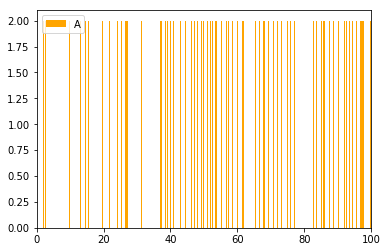

In [449]:
plt.bar(A_t, height=2, width=0.1, color='orange')
plt.legend('A')
plt.xlim(0,100)
plt.show()

In [450]:
#lambda_B[0,0]

In [451]:
#A est independent de B, on commmence par le sampling de A, 
data = pd.DataFrame(index=pd.to_timedelta(A_t, unit='s'), data={'event': [ord('A')] * len(A_t)})

In [452]:
#parent A count in interval [0,5]
data['t-5,t'] = data.rolling('5S')['event'].count()

In [453]:
#parent A count in interval [5,20]
data['t-5,t-10'] = data.rolling('20S')['event'].count() - data['t-5,t']

In [454]:
#seuillage pour avoir les vecteurs de comptage (seuil fixé à 1)
data['C_B'] = data.apply(lambda row: tuple((row[['t-5,t', 't-5,t-10']] > 1 ) * 1), axis=1)

In [455]:
data['lambda_B'] = data['C_B'].transform(lambda cb: lambda_B[cb])

In [456]:
data

,event,"t-5,t","t-5,t-10",C_B,lambda_B
00:00:00.036217,65,1.0,0.0,"(0, 0)",0.003
00:00:00.155962,65,2.0,0.0,"(1, 0)",3.000
00:00:00.170541,65,3.0,0.0,"(1, 0)",3.000
00:00:01.681821,65,4.0,0.0,"(1, 0)",3.000
00:00:01.996853,65,5.0,0.0,"(1, 0)",3.000
00:00:02.037387,65,6.0,0.0,"(1, 0)",3.000
00:00:02.469619,65,7.0,0.0,"(1, 0)",3.000
00:00:02.695427,65,8.0,0.0,"(1, 0)",3.000
00:00:03.660316,65,9.0,0.0,"(1, 0)",3.000
00:00:03.710374,65,10.0,0.0,"(1, 0)",3.000


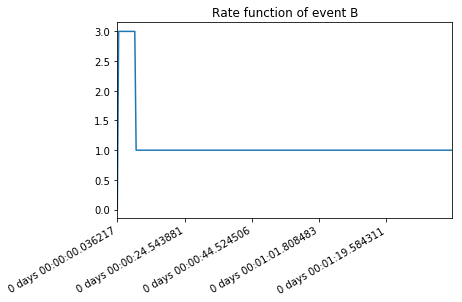

In [459]:
data['lambda_B'].plot()
plt.title('Rate function of event B')#notice how it's piecewise constant
plt.show()

In [460]:
data.reset_index(inplace=True)

In [461]:
t = W_min
B_t = np.array([])
while t < W_max:
    t_lambda_change = data[data['index'].dt.total_seconds() <= t]['index'].shape[0] - 1
    if t_lambda_change == -1:
        lambda_B_t = lambda_B[0,0]
    else:
        lambda_B_t = data.iloc[t_lambda_change]['lambda_B']
    
    y = np.random.uniform()
    waiting_time = -np.log(1-y) / lambda_B_t
    
    if t_lambda_change + 1 == len(data) or t + waiting_time <= data['index'].dt.total_seconds()[t_lambda_change + 1]: 
        t += waiting_time
        B_t = np.append(B_t, t)
    else:
        t = data['index'].dt.total_seconds()[t_lambda_change + 1]


In [462]:
A_t = pd.to_timedelta(A_t, unit='s')
B_t = pd.to_timedelta(B_t, unit='s')

time = A_t.append(B_t)
sampled_data = pd.DataFrame(index=time, data={'event': ['B'] * len(time)})
sampled_data.loc[A_t] = 'A'
sampled_data.sort_index(inplace=True)

In [463]:
sampled_data

,event
00:00:00.036217,A
00:00:00.155962,A
00:00:00.170541,A
00:00:01.176285,B
00:00:01.656841,B
00:00:01.681821,A
00:00:01.996853,A
00:00:02.037387,A
00:00:02.079881,B
00:00:02.190561,B


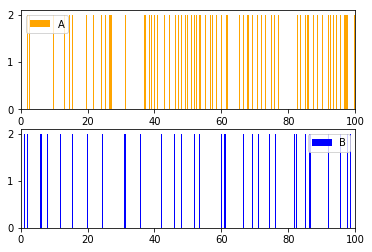

In [464]:
plt.subplot(2, 1, 1)
plt.bar(A_t.total_seconds(), height=2, width=0.1, color='orange')
plt.legend('A')
plt.xlim(0,100)

plt.subplot(2, 1, 2)
plt.bar(B_t.total_seconds(), height=2, width=0.1, color='blue')
plt.legend('B')
plt.xlim(0,100)

plt.show()

## calcul de vraisemblence